# *Copyright Information*

- *Reference: https://gymnasium.farama.org/content/basic_usage/*

- <font color="blue">*Changes, inferences, side comments and aprroaches were carried out by Damadori on:</font> https://github.com/IA-DAMA*

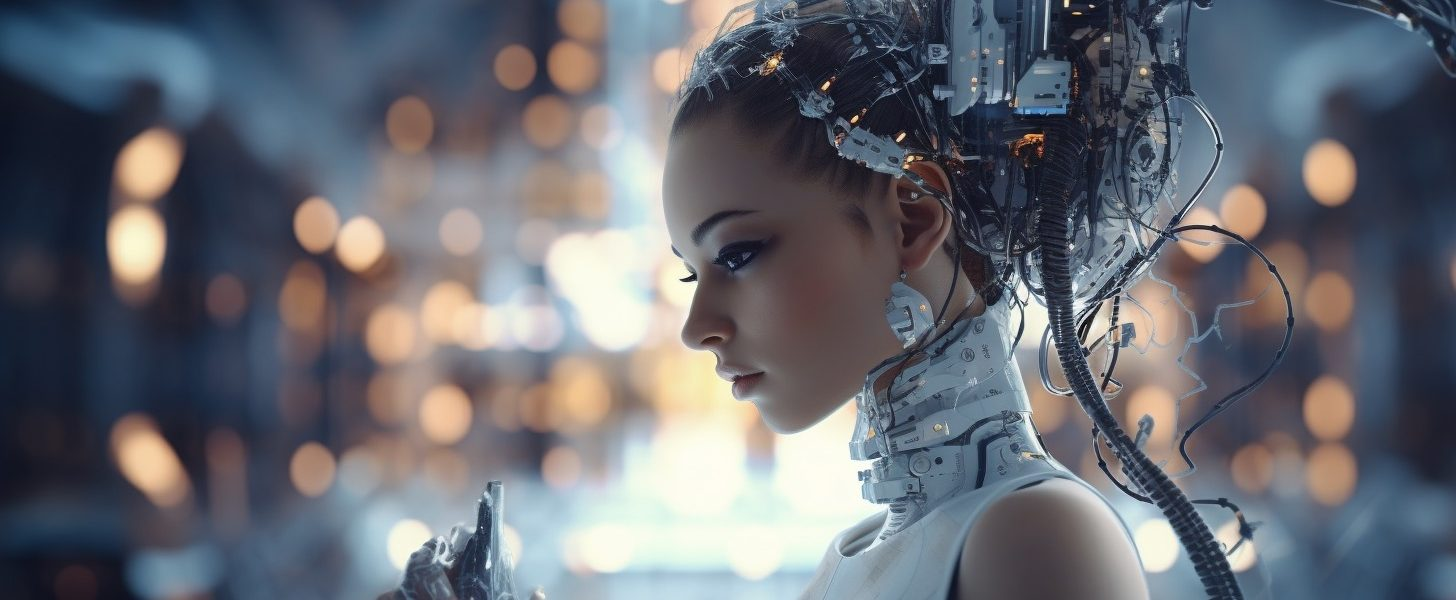

# <font color="red">*Developed and modified by IA-DAMA*</font>

![](https://github.com/IA-DAMA/DAMA-IA-RL/blob/main/Damamodified.jpeg?raw=1)

# *Introduction to CartPole Reinforcement Learning*

*In this code adventure, we dive into the exciting realm of reinforcement learning, using the CartPole environment as our playground. Reinforcement learning allows agents to learn by interacting with their environments, making sequential decisions along the way.*

*Our mission is to explore CartPole's fundamental concepts step by step. We'll start by importing essential libraries like Gym, NumPy, and time to equip ourselves with the tools needed for this journey.*

*CartPole represents a simple yet captivating challenge: balancing a pole on a moving cart. We create this virtual world and visualize it in "human" mode using Gym. This environment will serve as our training ground to understand the core principles of reinforcement learning.*

*We'll reset the environment to obtain its initial state, which is essential for our agent's interactions. Visualization with env.render() helps us observe these interactions.*

*Taking action in CartPole means pushing the cart in a direction, and we'll see its impact as we go along. We'll explore the observation space, learn its bounds, and understand what our agent can perceive.*

*Env.action_space reveals the available actions in CartPole, typically discrete choices like moving the cart left or right.*

*We'll peek into environment specifications to understand CartPole's unique characteristics, including episode time limits and reward thresholds.*

*Finally, we'll set the stage for a simulation adventure, iterating through episodes, taking random actions, and observing how our agent navigates this balancing act.*

*Through this hands-on exploration, we'll grasp the foundations of reinforcement learning and prepare for more advanced strategies in the future. Let's begin our CartPole adventure in reinforcement learning!*



# *Importing libraries*



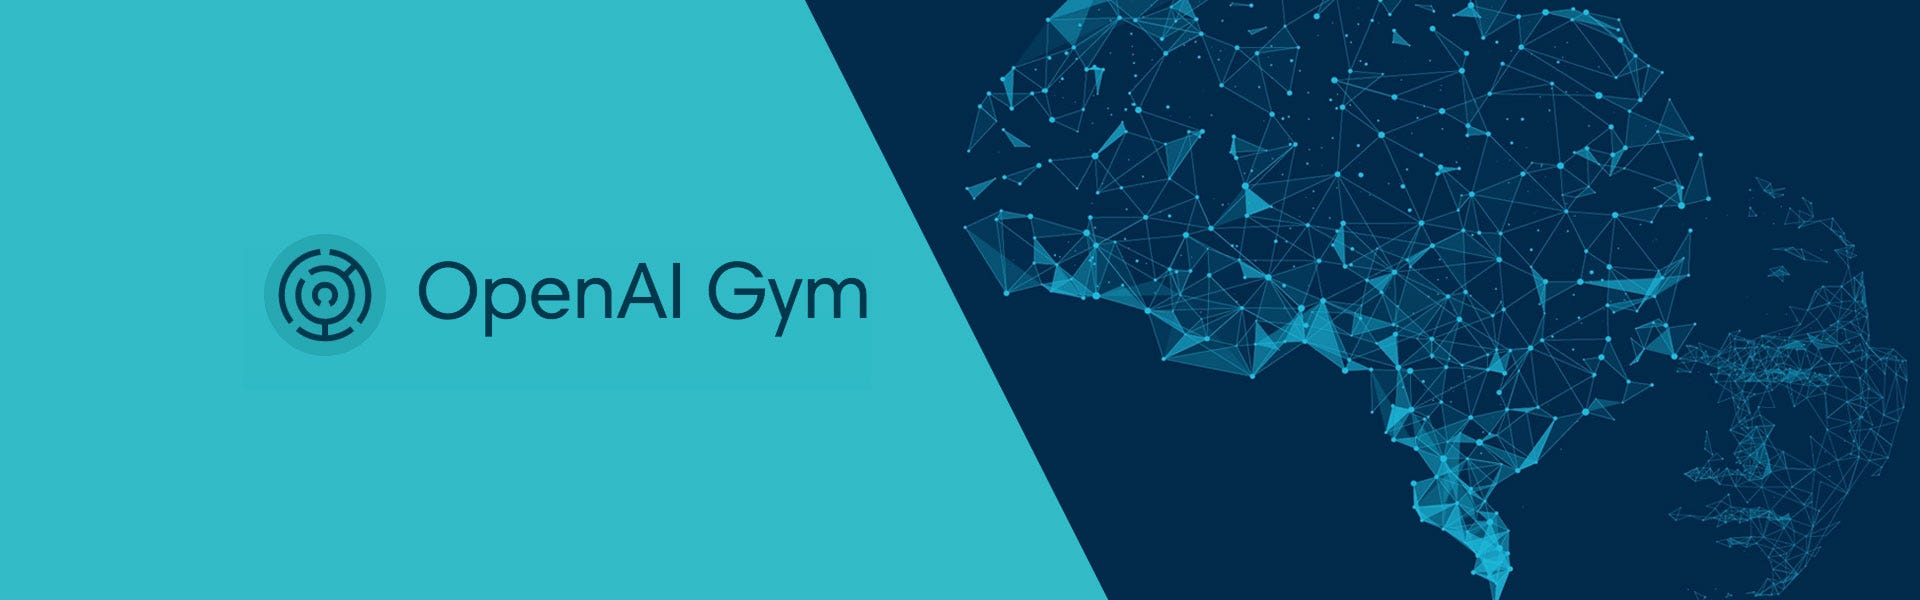

- *This code cell imports the necessaru labriries for the code to follow*

In [ ]:
import gym
# instead of gym, import gymnasium
#import gymnasium as gym
import numpy as np
import time

# *Create Envronment*

*RL learning environment using the Gym library. Specifically, it creates an environment with the name 'CartPole-v1', which represents the CartPole problem. The render_mode='human' argument indicates that the environment should render a graphical representation of the simulation for human viewing.*

In [ ]:
# create environment
env=gym.make('CartPole-v1',render_mode='human')

 # *Resetting the Environment and Obtaining the Initial State*

*The result is a tuple containing the initial state of the environment, which is stored in the variable 'state'. The second element of the tuple is ignored here (represented by'_'). This initial state is typically used as the starting point for the agent's interactions with the environment during training or testing*

In [ ]:
# reset the environment, and returns an initial state
(state,_)=env.reset()

# *Rendering the Environment*

*Rendering the environment is often used to visualize the agent's interactions with the environment, making it easier to observe how the agent performs in the task.*

In [ ]:
# render the environment
env.render()
# close the environment
#env.close()

# *Taking an Action in the Environment*

*The argument 0 represents a specific action, and the exact meaning of this action depends on the specific environment (in this case, CartPole). This action typically corresponds to an agent's decision to perform a particular action, such as moving the cart in a particular direction. The effect of this action on the environment will be reflected in subsequent states and rewards, allowing the agent to learn and adapt its behavior.*


In [ ]:
# push cart in one direction
env.step(0)

(array([ 0.00767532, -0.19117323,  0.01515313,  0.30332956], dtype=float32),
 1.0,
 False,
 False,
 {})

 # *Accessing the Observation Space*

*The observation space defines the range and type of observations (state information) that the environment provides to the agent. The specific characteristics of the observation space, such as its dimensionality and the meaning of each dimension, depend on the environment itself. Understanding the observation space is crucial for designing and training reinforcement learning agents, as it informs the agent about the information it can use to make decisions.*

In [ ]:
# observation space limits
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

# *Accessing the Lower Bound of the Observation Space*


*These values are important for understanding the range of possible observations that the agent can receive from the environment. By knowing the lower limit, you can determine the valid range of observations and the scale of the state space for designing the agent's neural network or other components.*


In [ ]:
# lower limit
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

# *Accessing the Upper Bound of the Observation Space*

*These values are important for understanding the range of possible observations that the agent can receive from the environment. By knowing the upper limit, you can determine the valid range of observations and the scale of the state space for designing the agent's neural network or other components.*

In [ ]:
# upper limit
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

# *Accessing the Action Space*

*The action space defines the set of possible actions that the agent can take within the environment. In CartPole, this space typically consists of discrete actions, such as pushing the cart left or right. Understanding the action space is crucial for designing and implementing the agent's decision-making process, as it determines the valid actions the agent can choose from during training and testing.*

In [ ]:
# action space
env.action_space

Discrete(2)

# *Accessing Environment Specifications*

*These specifications are useful for understanding the characteristics and constraints of the environment, which can be crucial when designing and training reinforcement learning agents to interact with the environment effectively.*

In [ ]:
# all the specs
env.spec

EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'render_mode': 'human'}, namespace=None, name='CartPole', version=1)

# *Maximum Number of Steps per Episode*

*In this specific case, the output indicates that the maximum number of steps per episode is set to 5. This information is essential for understanding the time constraints within which the agent must complete its task during training or evaluation. It helps in defining the termination conditions for episodes and is a critical parameter in reinforcement learning experiments.*

In [ ]:
# maximum number of steps per episode
env.spec.max_episode_steps

500

# *Reward Threshold per Episode*

*The output indicates that the reward threshold for this specific CartPole environment is set to 475.0. This threshold serves as a benchmark for determining if the agent has learned a successful policy, as the agent's goal is often to accumulate rewards above this threshold within an episode.*



In [ ]:
# reward threshold per episode
env.spec.reward_threshold

475.0

 # *Simulating the Environment*

 *These variables are essential for configuring the simulation of the CartPole environment, allowing you to specify how many episodes to run and the maximum duration of each episode.*

In [ ]:
# simulate the environment
episodeNumber=500
timeSteps=100

# *Simulating Episodes in the Environment*

- *for episodeIndex in range(episodeNumber): This loop iterates through a specified number of episodes (500 in this case).*
- *initial_state=env.reset(): It resets the environment to its initial state and retrieves the initial state.*
- *print(episodeIndex): Prints the current episode index.*
- *env.render(): Renders the environment, allowing you to visualize the simulation.*
- *appendedObservations=[]:* *Initializes an empty list to store observations within the episode.*
- *for timeIndex in range(timeSteps):: This nested loop simulates individual time steps within an episode (up to a maximum of 100 time steps).*
- *print(timeIndex): Prints the current time step index within the episode.*
- *random_action=env.action_space.sample(): Selects a random action from the action space. This action is chosen for exploration and is not based on any policy.*
- *observation, reward, terminated, truncated, info =env.step(random_action): Executes the selected action in the environment, which results in a new observation, a reward, and information about whether the episode has terminated.*
- *appendedObservations.append(observation): Appends the observation obtained from the environment to the list of observations.*
- *time.sleep(0.1): Introduces a small delay (0.1 seconds) between time steps for visualization purposes.*
- *if (terminated):: Checks if the episode has terminated.*
- *time.sleep(1): If the episode has terminated, it adds a longer delay (1 second) before exiting the loop. This delay is often used to observe the final state of the environment.*
- *break: Exits the inner loop.*
- *env.close(): Closes the environment, ending the simulation.*



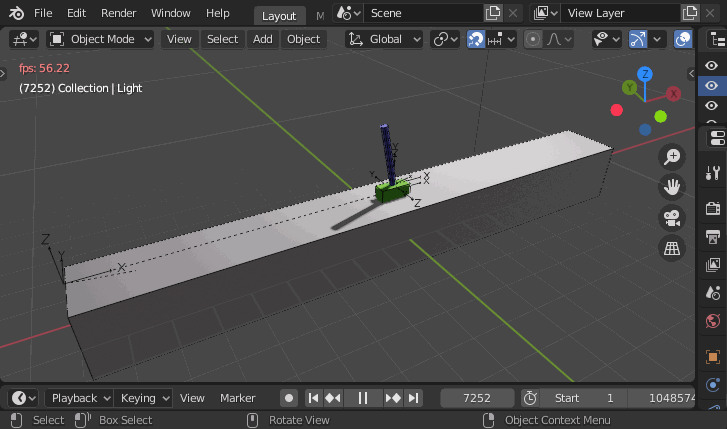

In [ ]:
for episodeIndex in range(episodeNumber):
    initial_state=env.reset()
    print(episodeIndex)
    env.render()
    appendedObservations=[]
    for timeIndex in range(timeSteps):
        print(timeIndex)
        random_action=env.action_space.sample()
        observation, reward, terminated, truncated, info =env.step(random_action)
        appendedObservations.append(observation)
        time.sleep(0.1)
        if (terminated):
            time.sleep(1)
            break

env.close()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
1
0
1
2
3
4
5
6
7
8
9
10
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
7
0
1
2
3
4
5
6
7
8
9
10
11
12
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
11
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
18
0
1
2
3
4
5
6


In [ ]:
env.close()

# <font color="red">*Conclusion:*</font>






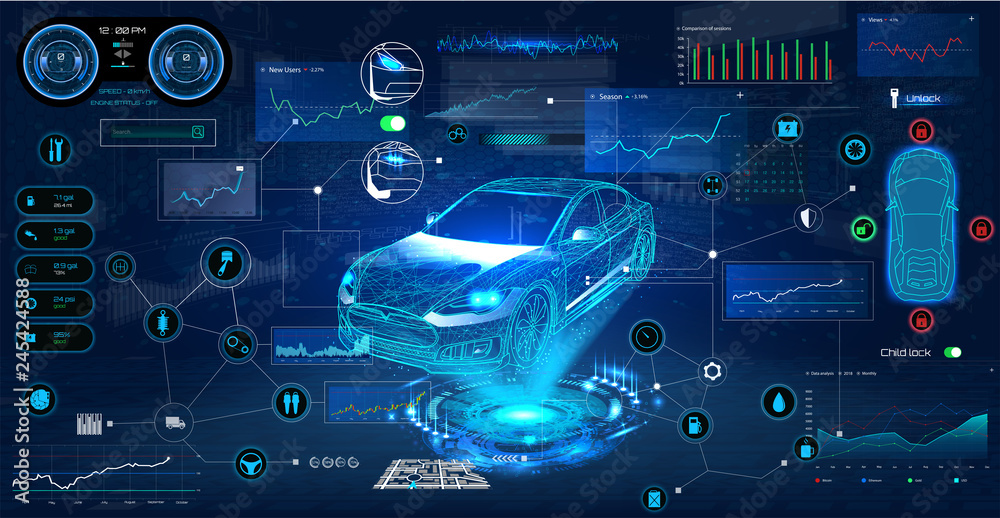

![](https://github.com/IA-DAMA/DAMA-IA-RL/blob/main/gym3.jpg?raw=1)


# *Navigating the World of Reinforcement Learning with CartPole*

*In this project, we delved into the fascinating realm of reinforcement learning, using the CartPole problem as our testing ground. Our journey began with the setup of the CartPole environment, an essential foundational step for any reinforcement learning experiment. We imported the necessary libraries, configured the environment, and explored its observation and action spaces, gaining a deep understanding of the task at hand.*

*As we progressed, we witnessed the interaction between our agent and the CartPole environment. Through the lens of rendering, we could visually observe how our agent's actions impacted the stability of the pole atop the moving cart. This allowed us to gain valuable insights into the dynamics of the problem.*

*Running simulations over multiple episodes provided us with a comprehensive view of the learning process. We watched as the agent adapted and improved its performance through trial and error, ultimately striving to keep the pole upright.*

*While our exploration has been introductory, it opens doors to further adventures in reinforcement learning. From crafting intelligent agents to solving complex tasks, the knowledge gained here forms the foundation for more advanced experiments and projects in this exciting field.*

*We encourage you to leverage this code as a starting point for your own exploration of reinforcement learning. Whether you're a beginner seeking to grasp the basics or an enthusiast ready for more complex challenges, this project serves as a valuable resource on your journey towards mastering reinforcement learning.*

*Thank you for joining us on this adventure. Happy coding, and may your reinforcement learning endeavors be both rewarding and enlightening!*